In [1]:
import matplotlib.pyplot as plt
import numpy
import scipy.stats
import pandas
import seaborn

import rfcorr.random_forest
import rfcorr.extra_trees

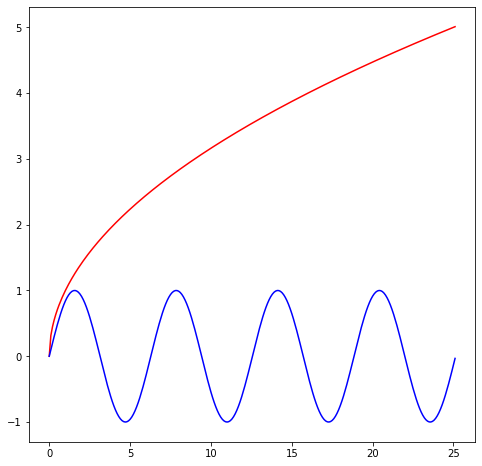

In [2]:
x = numpy.arange(0, 8*numpy.pi, 0.1)
y1 = numpy.sqrt(x)
y2 = numpy.sin(x)

f, ax = plt.subplots(1, 1, figsize=(8, 8))
_ = ax.plot(x, y1, color='red')
_ = ax.plot(x, y2, color='blue')

In [3]:
df = pandas.DataFrame(zip(x, y1, y2), columns=["x", "y1", "y2"])
df.corr(method="pearson")

,x,y1,y2
x,1.000000,0.978639,-0.194091
y1,0.978639,1.000000,-0.206973
y2,-0.194091,-0.206973,1.000000


In [4]:
df.corr(method="spearman")

,x,y1,y2
x,1.000000,1.000000,-0.186751
y1,1.000000,1.000000,-0.186751
y2,-0.186751,-0.186751,1.000000


In [5]:
rs = numpy.random.RandomState(42)
pandas.DataFrame(rfcorr.random_forest.get_pairwise_corr(df.values, 
                                                        num_trees=1000,
                                                        lag=0,
                                                        method="regression", 
                                                        random_state=rs),
                 columns=["x", "y1", "y2"],
                 index=["x", "y1", "y2"])

,x,y1,y2
x,1.000000,0.992054,0.007946
y1,0.992457,1.000000,0.007543
y2,0.504735,0.495265,1.000000


In [6]:
rs = numpy.random.RandomState(42)
pandas.DataFrame(rfcorr.extra_trees.get_pairwise_corr(df.values, 
                                                      num_trees=1000,
                                                      lag=0,
                                                      method="regression", 
                                                      random_state=rs),
                 columns=["x", "y1", "y2"],
                 index=["x", "y1", "y2"])

,x,y1,y2
x,1.000000,0.987226,0.012774
y1,0.984109,1.000000,0.015891
y2,0.508985,0.491015,1.000000


In [7]:
rs = numpy.random.RandomState(42)
pandas.DataFrame(rfcorr.random_forest.get_pairwise_corr(df.values, 
                                                      num_trees=1000,
                                                      lag=0,
                                                      method="regression", 
                                                      use_permutation=True,
                                                      random_state=rs),
                 columns=["x", "y1", "y2"],
                 index=["x", "y1", "y2"])

,x,y1,y2
x,1.000000,1.919737,0.001276
y1,1.965436,1.000000,0.003697
y2,0.649579,0.628396,1.000000


In [8]:
rs = numpy.random.RandomState(42)
pandas.DataFrame(rfcorr.extra_trees.get_pairwise_corr(df.values, 
                                                      num_trees=1000,
                                                      lag=0,
                                                      method="regression", 
                                                      use_permutation=True,
                                                      random_state=rs),
                 columns=["x", "y1", "y2"],
                 index=["x", "y1", "y2"])

,x,y1,y2
x,1.000000,1.91192,0.001160
y1,1.942176,1.00000,0.002455
y2,0.738190,0.68837,1.000000
